<a class="anchor" id="0."></a>
# **Contents**

1. [Pytorch Basics](#1.)
* * [1.1. Autograde Example 1](#1.1.)
* * [1.2. Autograde Example 2](#1.2.)
* * [1.3. Dataset Pipeline to Feed Model](#1.3.)
* * [1.4. Pretrained Computer Vision Models](#1.4.)
* * [1.5. Save and Load the Model](#1.5.)
2. [Linear Regression](#2.)
* * [2.1. Load Boston Dataset](#2.1.)
* * [2.2. Prepare Dataloaders](#2.2.)
* * [2.3. Create Model](#2.3.)
* * [2.4. Define Loss Function and Optimizer](#2.4.)
* * [2.5. Train Model](#2.5.)
* * [2.6. Make Prediction](#2.6.)
3. [Logistic Regression](#3.)
* * [3.1. Load Breast Cancer Dataset](#3.1.)
* * [3.2. Prepare Dataloaders](#3.2.)
* * [3.3. Create Model](#3.3.)
* * [3.4. Define Loss Function and Optimizer](#3.4.)
* * [3.5. Train Model](#3.5.)
* * [3.6. Make Prediction](#3.6.)
4. [Feedforward Neural Network](#4.)
* * [4.1. Load MNIST Dataset](#4.1.)
* * [4.2. Prepare Dataloaders](#4.2.)
* * [4.3. Create Model](#4.3.)
* * [4.4. Define Loss Function and Optimizer](#4.4.)
* * [4.5. Train Model](#4.5.)
* * [4.6. Make Prediction](#4.6.)

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import torch
import torchvision
from torch import nn
from torchvision import transforms
from sklearn import datasets

import os



[Go to Contents Menu](#0.)
<a class="anchor" id="1."></a>

# **1. Pytorch Basics**  

[Go to Contents Menu](#0.)
<a class="anchor" id="1.1."></a>

# **1.1. Autograde Example 1**  

In [61]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

print(x, w, b, "\n",x.item(), w.item(), b.item())

# Computional grap
y = w*x + b
#Compute gradient
y.backward()
print("x.grad:",x.grad, "\nw.grad:",w.grad, "\nb.grad:",b.grad)

tensor(1., requires_grad=True) tensor(2., requires_grad=True) tensor(3., requires_grad=True) 
 1.0 2.0 3.0
x.grad: tensor(2.) 
w.grad: tensor(1.) 
b.grad: tensor(1.)


[Go to Contents Menu](#0.)
<a class="anchor" id="1.2."></a>

# **1.2. Autograde Example 2**  

In [62]:
x = torch.randn(10, 3)
y = torch.randn(10, 2)

linear = nn.Linear(3, 2)

#Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

#forward pass
pred = linear(x)
#Compute loss
loss = loss_fn(pred, y)
print("loss:", loss.item())

#Backward pass
loss.backward()

#print gradients
print("w:", linear.weight.grad)
print("b:", linear.bias.grad)

# Step gradient descent
optimizer.step()


#After one step optimization
pred = linear(x)
loss = loss_fn(pred, y)
print("After one step loss:", loss.item())



loss: 0.7779600620269775
w: tensor([[-0.2230,  0.2892, -0.0796],
        [-0.2049,  0.0041,  0.2031]])
b: tensor([-0.0305, -0.8985])
After one step loss: 0.7677006125450134


[Go to Contents Menu](#0.)
<a class="anchor" id="1.3."></a>

# **1.3. Dataset Pipeline to Feed Model**  

In [63]:
train_dataset = torchvision.datasets.CIFAR10(root = "data",
                                            train=True,
                                            transform=transforms.ToTensor(),
                                            download=True)
image, label = train_dataset[0]
print(image.shape, label)

Files already downloaded and verified
torch.Size([3, 32, 32]) 6


In [64]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=64,
                                               shuffle=True)
data_iter = iter(train_dataloader)
images, labels = data_iter.next()
print(images.shape, labels.shape)

torch.Size([64, 3, 32, 32]) torch.Size([64])


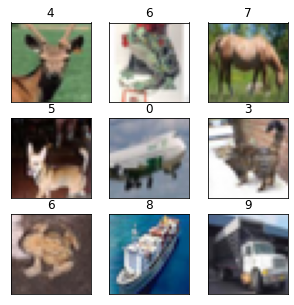

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
for i in range(9):
    img = images[i]
    plt.subplot(3, 3 , i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(labels[i].item())
    plt.imshow(img.moveaxis(0, 2))
plt.show()

In [66]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        #initialize file paths
        pass
    def __getitem__(self, index):
        # preprocess data and return x, y
        pass
    def __len__(self):
        # return length of dataset
        pass
    
    


[Go to Contents Menu](#0.)
<a class="anchor" id="1.4."></a>

# **1.4. Pretrained Computer Vision Models**  

In [67]:
print(*[name  for name in dir(torchvision.models) if "__" not in name], sep="\n")

AlexNet
DenseNet
EfficientNet
GoogLeNet
GoogLeNetOutputs
Inception3
InceptionOutputs
MNASNet
MobileNetV2
MobileNetV3
RegNet
ResNet
ShuffleNetV2
SqueezeNet
VGG
_GoogLeNetOutputs
_InceptionOutputs
_utils
alexnet
densenet
densenet121
densenet161
densenet169
densenet201
detection
efficientnet
efficientnet_b0
efficientnet_b1
efficientnet_b2
efficientnet_b3
efficientnet_b4
efficientnet_b5
efficientnet_b6
efficientnet_b7
feature_extraction
googlenet
inception
inception_v3
mnasnet
mnasnet0_5
mnasnet0_75
mnasnet1_0
mnasnet1_3
mobilenet
mobilenet_v2
mobilenet_v3_large
mobilenet_v3_small
mobilenetv2
mobilenetv3
quantization
regnet
regnet_x_16gf
regnet_x_1_6gf
regnet_x_32gf
regnet_x_3_2gf
regnet_x_400mf
regnet_x_800mf
regnet_x_8gf
regnet_y_16gf
regnet_y_1_6gf
regnet_y_32gf
regnet_y_3_2gf
regnet_y_400mf
regnet_y_800mf
regnet_y_8gf
resnet
resnet101
resnet152
resnet18
resnet34
resnet50
resnext101_32x8d
resnext50_32x4d
segmentation
shufflenet_v2_x0_5
shufflenet_v2_x1_0
shufflenet_v2_x1_5
shufflenet_v2

In [68]:
print(*[name  for name in dir(torchvision.models.detection) if "_" not in name], sep="\n")

FasterRCNN
KeypointRCNN
MaskRCNN
RetinaNet
SSD
retinanet
rpn
ssd
ssdlite
transform


In [69]:
print(*[name  for name in dir(torchvision.models.segmentation) if "_" not in name], sep="\n")

DeepLabV3
FCN
LRASPP
deeplabv3
fcn
lraspp
segmentation


In [70]:
model = torchvision.models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.last_channel, 10)

sampels = torch.Tensor(64, 3 ,224 ,224)
outputs = model(sampels)
print(sampels.shape, outputs.shape)

torch.Size([64, 3, 224, 224]) torch.Size([64, 10])


In [71]:
model = torchvision.models.mobilenet_v2(pretrained=True)
# To fine tune model freeze layers
for parameter in model.parameters():
    parameter.require_grad = False
    
model.classifier[1] = nn.Linear(model.last_channel, 10)

[Go to Contents Menu](#0.)
<a class="anchor" id="1.5."></a>

# **1.5. Save and Load the Model**  

In [72]:
model_name = "mobilenetv2.pt"
torch.save(model, model_name)
model = torch.load(model_name)

In [73]:
torch.save(model.state_dict(), model_name)
model.load_state_dict(torch.load(model_name))

<All keys matched successfully>

[Go to Contents Menu](#0.)
<a class="anchor" id="2."></a>

# **2. Linear Regression**  

[Go to Contents Menu](#0.)
<a class="anchor" id="2.1."></a>

# **2.1. Load Boston Dataset**  

In [74]:
boston = datasets.load_boston()

In [75]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [76]:
X = boston.data
y = boston.target
print(X.shape, y.shape)
print(X.dtype, y.dtype)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

(506, 13) (506,)
float64 float64


In [77]:
X = torch.tensor(X, dtype=torch.float)

y = torch.tensor(y, dtype=torch.float).view(-1, 1)

[Go to Contents Menu](#0.)
<a class="anchor" id="2.2."></a>

# **2.2. Prepare Dataloaders**  

In [78]:
class BostonDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __getitem__(self, index):
        return X[index], y[index]
    def __len__(self):
        return len(X)
    

train_dataset = BostonDataset(X, y)
#train_dataset = torch.utils.data.TensorDataset(X, y)
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=1,
                                               shuffle=True)
data_iter = iter(train_dataloader)
x_batch, y_batch = data_iter.next()
print(x_batch.shape, y_batch.shape)

torch.Size([1, 13]) torch.Size([1, 1])


[Go to Contents Menu](#0.)
<a class="anchor" id="2.3."></a>

# **2.3. Create Model**  

In [79]:
model = torch.nn.Sequential(nn.Linear(X.shape[1], 1))
print(model(x_batch))

tensor([[0.1975]], grad_fn=<AddmmBackward0>)


[Go to Contents Menu](#0.)
<a class="anchor" id="2.4."></a>

# **2.4. Define Loss Function and Optimizer**

In [80]:
epochs = 50
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


[Go to Contents Menu](#0.)
<a class="anchor" id="2.5."></a>

# **2.5. Train Model**

In [81]:
for  epoch in range(epochs):
    for X_batch, y_batch in train_dataloader:
        #X_batch = torch.FloatTensor(X_batch)
        #y_batch = torch.FloatTensor(y_batch)
        
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        # print(loss.item(), end=" ")
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch + 1) % int(epochs / 4) == 0:
        print(f"{epoch + 1}/{epochs} loss:{loss.item()}")

12/50 loss:0.2020168900489807
24/50 loss:0.0001074630708899349
36/50 loss:5.053088665008545
48/50 loss:19.330768585205078


[Go to Contents Menu](#0.)
<a class="anchor" id="2.6."></a>

# **2.6. Make Prediction**

In [82]:
predicted = model(X).detach().numpy()
predicted.shape

(506, 1)

In [83]:
for i in range(10):
    print(y[i], predicted[i])

tensor([24.]) [30.277664]
tensor([21.6000]) [25.120586]
tensor([34.7000]) [30.770748]
tensor([33.4000]) [28.853264]
tensor([36.2000]) [28.163918]
tensor([28.7000]) [25.439255]
tensor([22.9000]) [23.067305]
tensor([27.1000]) [19.511322]
tensor([16.5000]) [11.357694]
tensor([18.9000]) [18.91935]


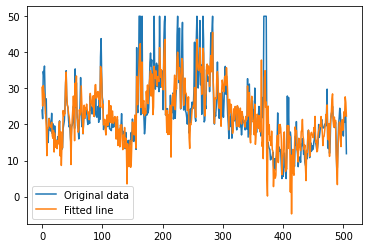

In [84]:

plt.plot(y.flatten(), label='Original data')
plt.plot(predicted.flatten(), label='Fitted line')
plt.legend()
plt.show()

[Go to Contents Menu](#0.)
<a class="anchor" id="3."></a>

# **3. Logistic Regression**  

[Go to Contents Menu](#0.)
<a class="anchor" id="3.1."></a>

# **3.1. Load Breast Cancer Dataset**  

In [85]:
breast_cancer = datasets.load_breast_cancer()
dir(breast_cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [86]:
X = breast_cancer.data
y = breast_cancer.target
print(np.unique(y))

df  = pd.DataFrame(X)
df.columns = breast_cancer.feature_names
df['target'] = y
df.head()

[0 1]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [87]:
# df.info()

In [88]:
#dir(torch)

In [89]:
X = torch.tensor(X, dtype=torch.float)

y = torch.tensor(y).view(-1, 1)

[Go to Contents Menu](#0.)
<a class="anchor" id="3.2."></a>

# **3.2. Prepare Dataset Loader**  

In [90]:
class BreastCancerDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __getitem__(self, idx):
        return X[idx], y[idx]
    def __len__(self):
        return len(X)
    
train_dataset = BreastCancerDataset(X, y)

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=1,
                                              shuffle=True)


In [91]:
train_dataloader_iter = iter(train_dataloader)
x_batch, y_batch = next(train_dataloader_iter)
print(x_batch.shape, y_batch.shape)

torch.Size([1, 30]) torch.Size([1, 1])


In [92]:
from sklearn.model_selection import train_test_split
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=35)

train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(),
                                 torch.from_numpy(y_train).long())
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=False)

test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_test).float(),
                                 torch.from_numpy(y_test).long())
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

[Go to Contents Menu](#0.)
<a class="anchor" id="3.3."></a>

# **3.3. Create Model**  

In [93]:
# model = nn.Linear(X.shape[1], 2)
model = torch.nn.Sequential(nn.Linear(X.shape[1], 2))

[Go to Contents Menu](#0.)
<a class="anchor" id="3.4."></a>

# **3.4. Define Loss Function and Optimizer**  

In [94]:
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

[Go to Contents Menu](#0.)
<a class="anchor" id="3.5."></a>

# **3.5. Train the Model**  

In [95]:
epochs = 100
for  epoch in range(epochs):
    for X_batch, y_batch in train_dataloader:
        #X_batch = torch.FloatTensor(X_batch)
        #y_batch = torch.FloatTensor(y_batch)
        y_batch = y_batch.squeeze_()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        # print(loss.item(), end=" ")
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % int(epochs/4) == 0:
        print(f"{epoch + 1}/{epochs} loss:{loss.item()}")



25/100 loss:125.5300064086914
50/100 loss:67.73299407958984
75/100 loss:69.79634857177734
100/100 loss:13.141519546508789


[Go to Contents Menu](#0.)
<a class="anchor" id="3.6."></a>

# **3.6. Make Predictions**  

In [96]:
y_train_pred = model(torch.tensor(X_train, dtype=torch.float)).detach().numpy()
y_train_pred.shape

(426, 2)

In [97]:
from sklearn import metrics
print(metrics.accuracy_score(np.argmax(y_train_pred, axis=1), y_train))

0.9225352112676056


In [98]:
y_test_pred = model(torch.tensor(X_test, dtype=torch.float)).detach().numpy()

In [99]:
print(metrics.accuracy_score(np.argmax(y_test_pred, axis=1), y_test))
print(metrics.confusion_matrix(np.argmax(y_test_pred, axis=1), y_test))
print(metrics.classification_report(np.argmax(y_test_pred, axis=1), y_test))

0.9020979020979021
[[41  2]
 [12 88]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        43
           1       0.98      0.88      0.93       100

    accuracy                           0.90       143
   macro avg       0.88      0.92      0.89       143
weighted avg       0.92      0.90      0.90       143



[Go to Contents Menu](#0.)
<a class="anchor" id="4."></a>

# **4. Feedforward Neural Network**  

In [100]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device:", device)

device: cuda


[Go to Contents Menu](#0.)
<a class="anchor" id="4.1."></a>

# **4.1. Load MNIST Dataset**  

In [101]:
train_dataset = torchvision.datasets.MNIST(root="data",
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)
test_dataset = torchvision.datasets.MNIST(root="data",
                                        train=False,
                                        transform=transforms.ToTensor())

[Go to Contents Menu](#0.)
<a class="anchor" id="4.2."></a>

# **4.2. Prepare Dataloaders**  

In [102]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=32,
                                              shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                             batch_size=32,
                                             shuffle=False)

In [103]:
x_batch, y_batch = next(iter(train_dataloader))
print(x_batch.shape, y_batch.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [104]:
len(train_dataloader)*32, len(test_dataloader)*32

(60000, 10016)

[Go to Contents Menu](#0.)
<a class="anchor" id="4.3."></a>

# **4.3. Create Model**  

In [105]:
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_class)
        
    def forward(self, x):
        output = self.fc1(x)
        output = self.relu(output)
        output = self.fc2(output)
        return output

model = NN(28*28, 512, 10).to(device)

[Go to Contents Menu](#0.)
<a class="anchor" id="4.4."></a>

# **4.4. Define Loss Functions and Optimizer**  

In [106]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

[Go to Contents Menu](#0.)
<a class="anchor" id="4.5."></a>

# **4.5. Train the Model**  

In [107]:
epochs = 10
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        pred = model(images)
        loss = loss_fn(pred, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % int(epochs / 2) == 0:    
        print(f"{epoch+1}/{epochs} loss:{loss.item()}")
        

5/10 loss:0.0037733300123363733
10/10 loss:0.0036720754578709602


[Go to Contents Menu](#0.)
<a class="anchor" id="4.6."></a>

# **4.6. Make Predictions**  

In [108]:
def evaluate(model, dataloader):
    correct, total = 0, 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(dataloader):
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predictions = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    return correct/total

In [109]:
print("train acc:{:.3f}".format(evaluate(model, train_dataloader)))

train acc:0.997


In [110]:
 print("test acc:{:.3f}".format(evaluate(model, test_dataloader)))

test acc:0.981
